## EPS Example Notebook 

This notebook shows an example replicating previous the simple electric power system implemented in [IBFM](https://github.com/DesignEngrLab/IBFM) in the `eps example` directory, with some basic fault propagation and visualization.

In [2]:
from eps import EPS
import fmdtools.sim.propagate as propagate
import fmdtools.analyze as an
from fmdtools.analyze.graph import ModelGraph

This script provides some example I/O for using static models, using the EPS system implemented in eps.py as an example.

A graphical representaiton of this system is shown below:

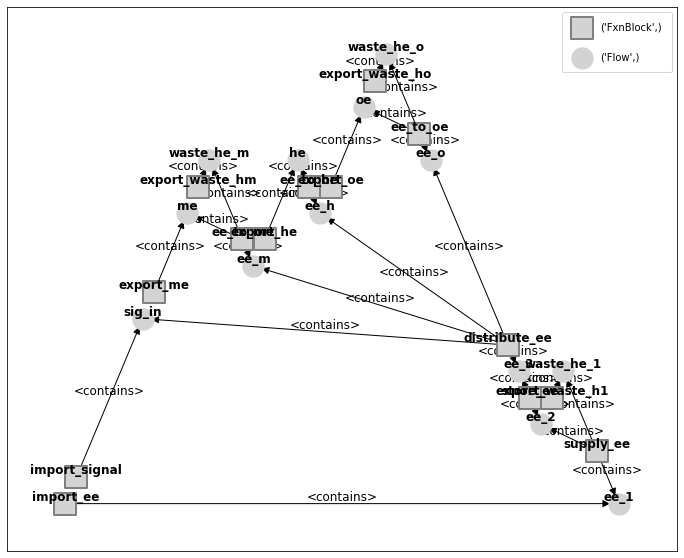

In [5]:
mdl= EPS()
mg = ModelGraph(mdl)
fig, ax = mg.draw()

As with dynamic models, in static models we use ``fp.run_one_fault`` to see the effects of single faults. All setup is performed in the Model class definition

In [6]:
result, mdlhist = propagate.one_fault(mdl, 'ee_to_me', 'toohigh_torque', desired_result="graph")

In this case, however, the output in ``mdlhists`` will be a single-dimensional dictionary (not something we can plot very well)

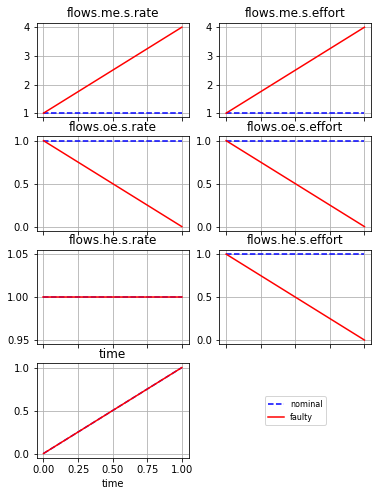

In [8]:
fig, ax = an.plot.hist(mdlhist, *mdlhist.nominal.keys())

As a result, it's better to look at the results graph for a visualization of what went wrong. In this case ``resgraph`` better represents the fault propagation of the system than in a dynamic model, since there is only one time-step to represent (rather than a set)

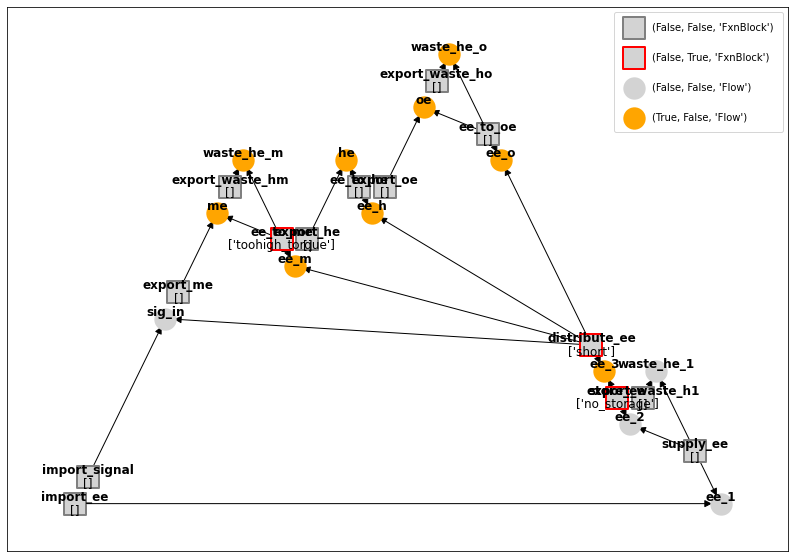

In [15]:
result.graph.set_edge_labels(title='')
fig, ax = result.graph.draw(figsize=(14,10))

We can run the set of single-fault scenarios on this model using ``fmdtools.sim.propagate.single_faults``. For single-fault scenarios, one does not need to use a ``SampleApproach``, since all faults are injected at a single time-step.

In [16]:
endclasses, mdlhists = propagate.single_faults(mdl, staged=True)

SCENARIOS COMPLETE: 100%|█████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 125.34it/s]


Using ``make_summarytable``, one can see the degradation effects of this fault on the flows:

In [24]:
mdlhists.import_ee_low_v_t0.flows.me.s['rate']

array([0.5, 0.5])

In [25]:
an.tabulate.result_summary_fmea(endclasses, mdlhists, *mdl.fxns, *mdl.flows)

,degraded,faulty,rate,cost,expected cost
ee_to_me_short_t1,"['me', 'oe', 'he']",[],0.0001,4950.0,21681.0
supply_ee_open_circuit_t1,"['me', 'oe', 'he']",[],0.0,1450.0,6.351
export_waste_ho_ineffective_sink_t0,[],[],0.00001,1000.0,438.0
export_waste_h1_ineffective_sink_t1,[],[],0.00001,1000.0,438.0
import_ee_high_v_t0,"['me', 'oe', 'he']",[],0.00001,3350.0,1467.3
...,...,...,...,...,...
export_waste_ho_hot_sink_t1,[],[],0.00002,500.0,438.0
import_ee_low_v_t1,"['me', 'oe', 'he']",[],0.00002,700.0,613.2
ee_to_me_toohigh_torque_t0,"['me', 'oe', 'he']",[],0.0001,5050.0,22119.0
store_ee_no_storage_t1,"['me', 'oe', 'he']",[],0.00001,3250.0,1423.5
